### Notebook Used in Part 2 of Basic NFL Data Analysis

This is the notebook I used for Part 2 of our Basic analysis of NFL games.
- NFL Season: 2018-19

Ram Narasimhan

Questions? Twitter: @ramnarasimhan

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Logic we will use:
1.     Pick each time, one by one.
1.    Filter their home games. Calc the win-loss Home loss = (total home games - home win)
1.   Filter their Away games. Do the same.

### All the Preprocessing Steps that we did in Part 1 one cell

In [30]:
base = "https://raw.githubusercontent.com/ryurko/nflscrapR-data/master/games_data/regular_season/reg_games_"
year = 2018
coda = ".csv"
url = base + str(year) + coda

df = pd.read_csv(url)

# There are some columns that we don't want. Let's drop those
drop_columns = ['type', 'state_of_game', 'game_url']

# axis = 1 is to tell Pandas to drop the columns.
# inplace = True drops them permanently
df.drop(columns=drop_columns, axis=1, inplace=True)

# We create two new columns in the data frame and store it. 
# This column can take negative values (if the home team lost) or positive values (if the home team won)
df['home_adv_score'] = df['home_score'] - df['away_score']

#THe following line creates a new column, with True/False values for whether the home team won
df['home_win'] = df['home_adv_score'] >= 0 
df['away_win'] = df['home_adv_score'] < 0 

In [31]:
print(df.shape) #one row for each game that was played
df.head()

(256, 10)


,game_id,home_team,away_team,week,season,home_score,away_score,home_adv_score,home_win,away_win
0,2018090600,PHI,ATL,1,2018,18,12,6,True,False
1,2018090900,BAL,BUF,1,2018,47,3,44,True,False
2,2018090907,NYG,JAX,1,2018,15,20,-5,False,True
3,2018090906,NO,TB,1,2018,40,48,-8,False,True
4,2018090905,NE,HOU,1,2018,27,20,7,True,False


In [32]:
teams = df['home_team'].unique()
teams #now we have a nice list. We can use it

array(['PHI', 'BAL', 'NYG', 'NO', 'NE', 'MIN', 'MIA', 'IND', 'CLE', 'LAC',
       'DEN', 'CAR', 'ARI', 'GB', 'DET', 'OAK', 'CIN', 'ATL', 'WAS',
       'TEN', 'TB', 'PIT', 'NYJ', 'BUF', 'SF', 'LA', 'JAX', 'DAL', 'CHI',
       'HOU', 'KC', 'SEA'], dtype=object)

----

# Calculate Points Differential for each team for each game

We have to take care. When it is a home game, it is home_score minus away_score.
When it is away_game, the differential is away_score minus the home_score.

In [40]:
home_df = pd.DataFrame()
home_df['team'] = df['home_team']
home_df['score_diff'] = df['home_adv_score']

away_df = pd.DataFrame()
away_df['team'] = df['away_team']
away_df['score_diff'] = df['home_adv_score'] * -1 


In [41]:
df_game_diff = pd.concat([home_df, away_df])

In [42]:
df_game_diff.columns

Index(['team', 'score_diff'], dtype='object')

The data is now ready. We can turn to plotting.

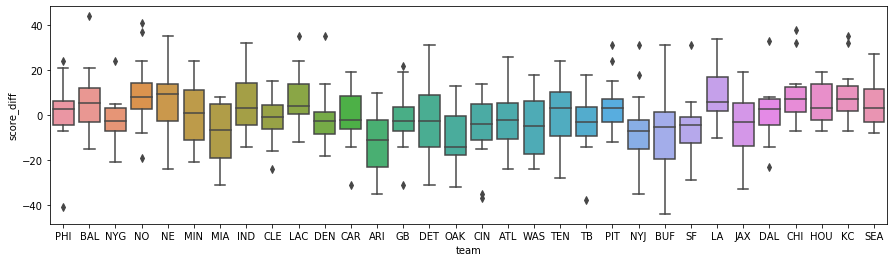

In [68]:
plt.figure(figsize=(15, 4)) # adjust the size
sns.boxplot(x='team', y='score_diff', data=df_game_diff);

In [60]:
# Sort the teams by DECREASING ORDER of their MEDIAN score differential
team_order = df_game_diff.groupby(by=["team"])["score_diff"].median().sort_values(ascending=False).index

In [65]:
team_order # names of teams, sorted by how we want it

Index(['NE', 'NO', 'KC', 'CHI', 'LA', 'BAL', 'LAC', 'TEN', 'SEA', 'PIT', 'HOU',
       'IND', 'DAL', 'PHI', 'MIN', 'CLE', 'CAR', 'ATL', 'NYG', 'GB', 'DET',
       'DEN', 'JAX', 'TB', 'CIN', 'SF', 'WAS', 'BUF', 'MIA', 'NYJ', 'ARI',
       'OAK'],
      dtype='object', name='team')

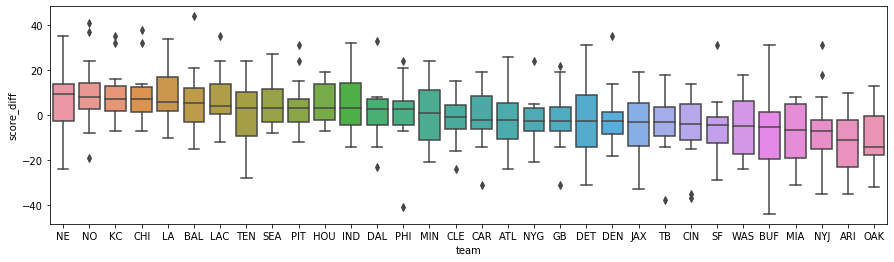

In [66]:
plt.figure(figsize=(15, 4))
sns.boxplot(x='team', y='score_diff', order=team_order, data=df_game_diff);
plt.savefig('../images/boxplot.JPG')

We took each time's score differential for each game. We first calculated the differential for the home teams, and then did the same for the Away teams. Thus we ended up with twice as many rows as the number of games, one row per team, two rows per game.

We then plotted Boxplots for each team, (16 data points in each Box/whisker plot for one team.)
Finally, we sorted the teams by the decreasing order of their median score differential to the plot we wanted.